# 📘 Course Project: Oscillatory and Nonlinear Dynamics in Bioprocess Systems

### 🎓 Master's in Quantitative Biology

---

## 🔬 Project Overview

This project models a **continuous bioreactor** system exhibiting **nonlinear dynamics** due to substrate inhibition. We extend classical Monod kinetics with an inhibitory term and perform a detailed computational analysis using Python.

This reflects realistic behavior in biochemical processes such as fermentation or cell culture systems, especially under high substrate concentrations.

---

### 🧠 Key Features Modeled

- Substrate inhibition using an extended Monod equation
- Nonlinear behavior including washout and productivity collapse
- Vector fields and phase planes for system dynamics
- Parameter sweeps and sensitivity analysis
- **Steady-state analysis** vs. dilution rate
- BONUS: **Delay differential simulation** for control effects

---

## 🧪 System of Equations

We simulate substrate \( S \) and biomass \( X \) concentrations with the following ODEs:

$$
\frac{dS}{dt} = D(S_{\text{in}} - S) - \frac{V_{\text{max}} \cdot S}{K_m + S + \frac{S^2}{K_i}} X
$$

$$
\frac{dX}{dt} = \left( \frac{V_{\text{max}} \cdot S}{K_m + S + \frac{S^2}{K_i}} - D \right) X
$$

---

## 📌 Variable Definitions

| Symbol              | Meaning                                           |
|---------------------|---------------------------------------------------|
| \( S \)             | Substrate concentration (g/L)                     |
| \( X \)             | Biomass concentration (g/L)                       |
| \( D \)             | Dilution rate (1/hr)                              |
| \( S_in) | Feed substrate concentration (g/L)                |
| \( V_max)| Maximum substrate uptake rate (1/hr)              |
| \( K_m \)           | Monod constant (g/L)                              |
| \( K_i \)           | Inhibition constant (g/L)                         |

---

## 🎯 Project Goals

- Simulate time evolution and visualize nonlinear reactor behavior  
- Analyze steady-state and dynamic system response  
- Perform sensitivity and parameter space mapping  
- Identify optimal operating regions and failure zones (e.g. washout)


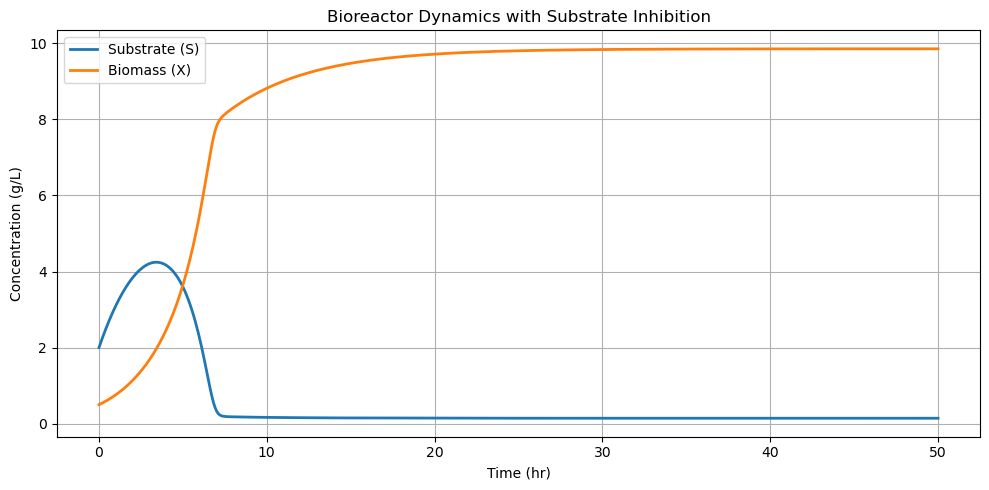

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE system
def substrate_inhibition_model(t, y, D, S_in, Vmax, Km, Ki):
    S, X = y
    mu = Vmax * S / (Km + S + (S**2 / Ki))  # Growth rate with substrate inhibition
    dSdt = D * (S_in - S) - mu * X
    dXdt = (mu - D) * X
    return [dSdt, dXdt]

# Parameters
D = 0.2              # Dilution rate (1/hr)
S_in = 10            # Feed substrate concentration (g/L)
Vmax = 0.9           # Maximum growth rate (1/hr)
Km = 0.5             # Monod constant (g/L)
Ki = 10              # Inhibition constant (g/L)

# Initial conditions: [S0, X0]
y0 = [2.0, 0.5]

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)

# Solve the system
solution = solve_ivp(
    substrate_inhibition_model, 
    t_span, y0, 
    args=(D, S_in, Vmax, Km, Ki), 
    t_eval=t_eval
)

# Extract solution
S, X = solution.y
t = solution.t

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, S, label='Substrate (S)', linewidth=2)
plt.plot(t, X, label='Biomass (X)', linewidth=2)
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (g/L)')
plt.title('Bioreactor Dynamics with Substrate Inhibition')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Sensitivity Analysis: Effect of \( K_i \) on Biomass Dynamics

In this section, we simulate how varying the **substrate inhibition constant** \( K_i \) affects biomass growth.

### Biological Meaning:
- \( K_i \) controls how **sensitive** the cells are to high substrate concentrations.
- Lower \( K_i \) → stronger inhibition (cells stop growing at high \( S \))
- Higher \( K_i \) → weaker inhibition (closer to classic Monod behavior)

---

### Interpretation:

- Strong inhibition (low \( K_i \)) can **completely suppress bioreactor productivity**.
- A **moderate to high \( K_i \)** is essential for maintaining viable cell populations in substrate-rich environments.
- Understanding this helps in **strain selection** and **substrate dosing strategy**.



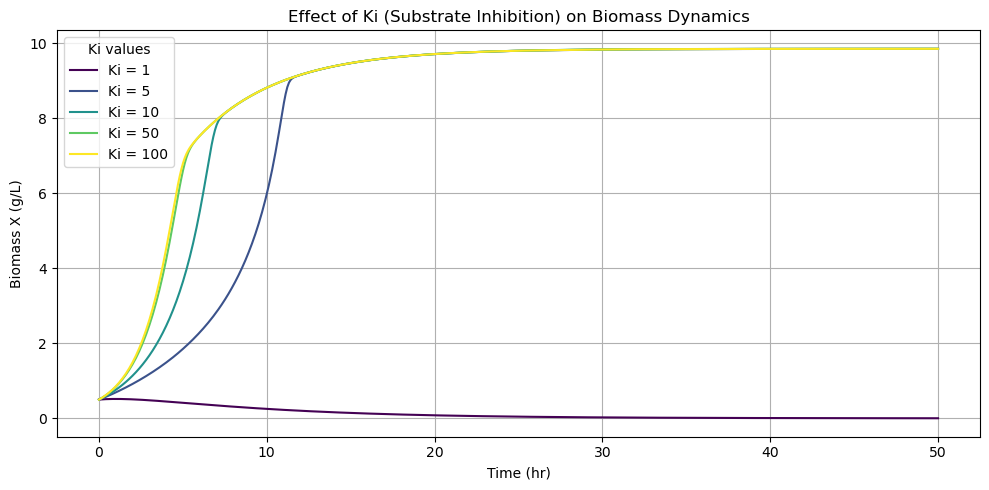

In [2]:
# Sweep over different values of Ki (inhibition strength)
Ki_values = [1, 5, 10, 50, 100]
colors = plt.cm.viridis(np.linspace(0, 1, len(Ki_values)))

plt.figure(figsize=(10, 5))

for Ki, color in zip(Ki_values, colors):
    sol = solve_ivp(
        substrate_inhibition_model,
        t_span, y0,
        args=(D, S_in, Vmax, Km, Ki),
        t_eval=t_eval
    )
    plt.plot(sol.t, sol.y[1], label=f'Ki = {Ki}', color=color)  # Biomass X

plt.xlabel('Time (hr)')
plt.ylabel('Biomass X (g/L)')
plt.title('Effect of Ki (Substrate Inhibition) on Biomass Dynamics')
plt.legend(title="Ki values")
plt.grid(True)
plt.tight_layout()
plt.show()


##  Phase Plane: Substrate vs Biomass

This vector field illustrates the dynamic behavior of the bioreactor system in state space.

- Arrows represent how substrate and biomass evolve together over time.
- The system tends to stabilize in regions of moderate substrate and biomass.
- Color intensity reflects the speed of system movement — faster in high-substrate, high-biomass regions.

The pattern confirms stable convergence toward steady state under substrate inhibition without delay.


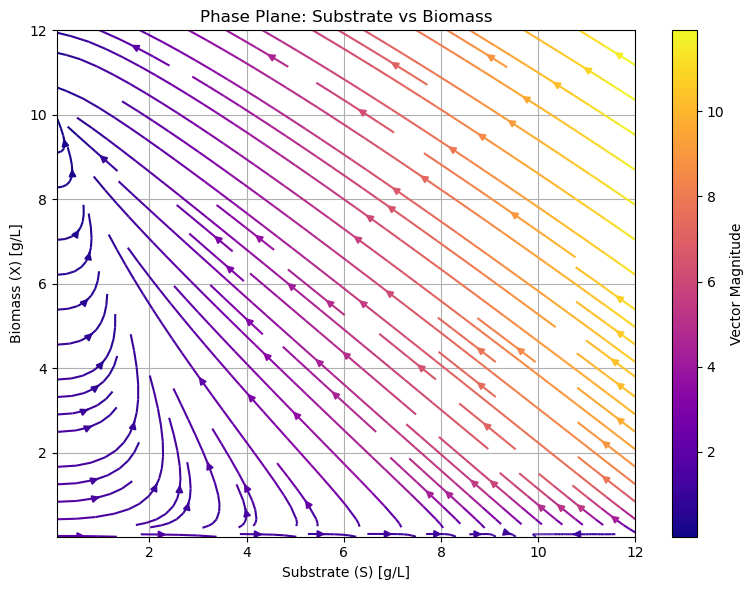

In [3]:
# Create a phase plane (X vs S) with vector field

# Define grid for S and X
S_vals = np.linspace(0.1, 12, 30)
X_vals = np.linspace(0.01, 12, 30)
S_grid, X_grid = np.meshgrid(S_vals, X_vals)

# Compute dS/dt and dX/dt at each point
dSdt = np.zeros_like(S_grid)
dXdt = np.zeros_like(X_grid)

for i in range(S_grid.shape[0]):
    for j in range(S_grid.shape[1]):
        S = S_grid[i, j]
        X = X_grid[i, j]
        mu = Vmax * S / (Km + S + (S**2 / Ki))  # μ(S)
        dSdt[i, j] = D * (S_in - S) - mu * X
        dXdt[i, j] = (mu - D) * X

# Plot the vector field
plt.figure(figsize=(8, 6))
plt.streamplot(S_vals, X_vals, dSdt.T, dXdt.T, color=np.hypot(dSdt.T, dXdt.T), cmap='plasma')
plt.xlabel('Substrate (S) [g/L]')
plt.ylabel('Biomass (X) [g/L]')
plt.title('Phase Plane: Substrate vs Biomass')
plt.colorbar(label='Vector Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()


##  Productivity Design Map: \( V_max \) vs \( K_i \)

This heatmap visualizes how **steady-state productivity** depends on the maximum specific growth rate \( V_max \) and the inhibition constant \( K_i \).

---

###  Interpretation:

- Productivity is **low** when \( V_max \leq D \) — the system cannot grow fast enough to sustain biomass.
- As \( V_max \) increases, productivity rapidly **saturates**.
- Higher \( K_i \) (weaker inhibition) slightly improves productivity, but shows diminishing returns.

---

### Design Insight:

Operating in the **upper right region** (high \( V_max \), moderate–high \( K_i \)) yields the **optimal productivity**.
This helps in:
- **Strain selection** (high growth potential, low inhibition)
- **Feed strategy design** for robust continuous operation


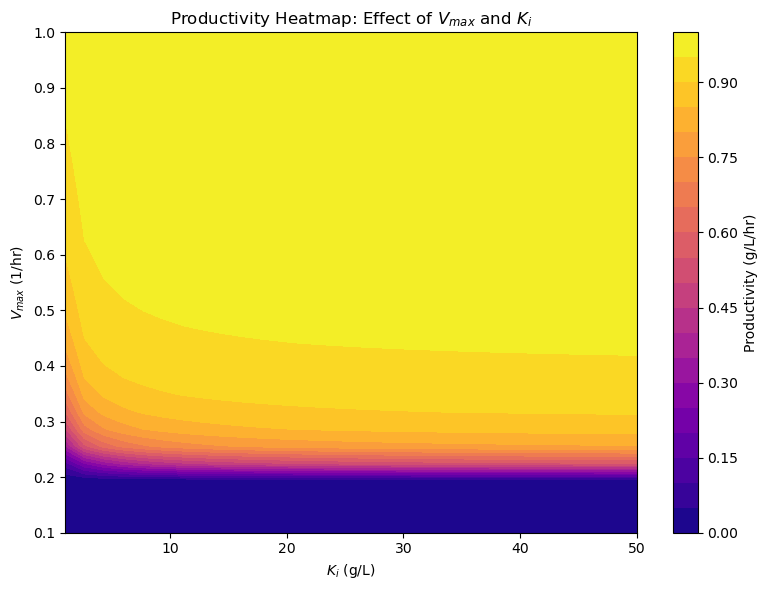

In [12]:
# Sweep ranges
vmax_vals = np.linspace(0.1, 1.0, 30)
ki_vals = np.linspace(1, 50, 30)

# Other constants
D = 0.2
S_in = 10
Km = 0.5
Y = 0.5

# Compute productivity = μ * X_ss for each (Vmax, Ki)
def steady_state_productivity(Vmax, Ki):
    S_ss = (D * Km) / (Vmax - D)
    mu = Vmax * S_ss / (Km + S_ss + S_ss**2 / Ki)
    X_ss = Y * (S_in - S_ss)
    return mu * X_ss if S_ss > 0 else 0

# Grid results
productivity_map = np.zeros((len(vmax_vals), len(ki_vals)))

for i, V in enumerate(vmax_vals):
    for j, K in enumerate(ki_vals):
        try:
            productivity_map[i, j] = steady_state_productivity(V, K)
        except:
            productivity_map[i, j] = np.nan

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(ki_vals, vmax_vals, productivity_map, 20, cmap="plasma")
plt.xlabel('$K_i$ (g/L)')
plt.ylabel('$V_{max}$ (1/hr)')
plt.title('Productivity Heatmap: Effect of $V_{max}$ and $K_i$')
plt.colorbar(label='Productivity (g/L/hr)')
plt.tight_layout()
plt.show()


## Steady-State Analysis

We calculate steady-state substrate \( S_ss \), biomass \( X_ss \), and productivity as a function of the **dilution rate** \( D \).

---

### Insights:

- As \( D to V_max ), substrate builds up and biomass collapses.
- There is a sweet spot for \( D \) where productivity is maximized.
- Beyond that point, the system may experience **washout** (no viable biomass).



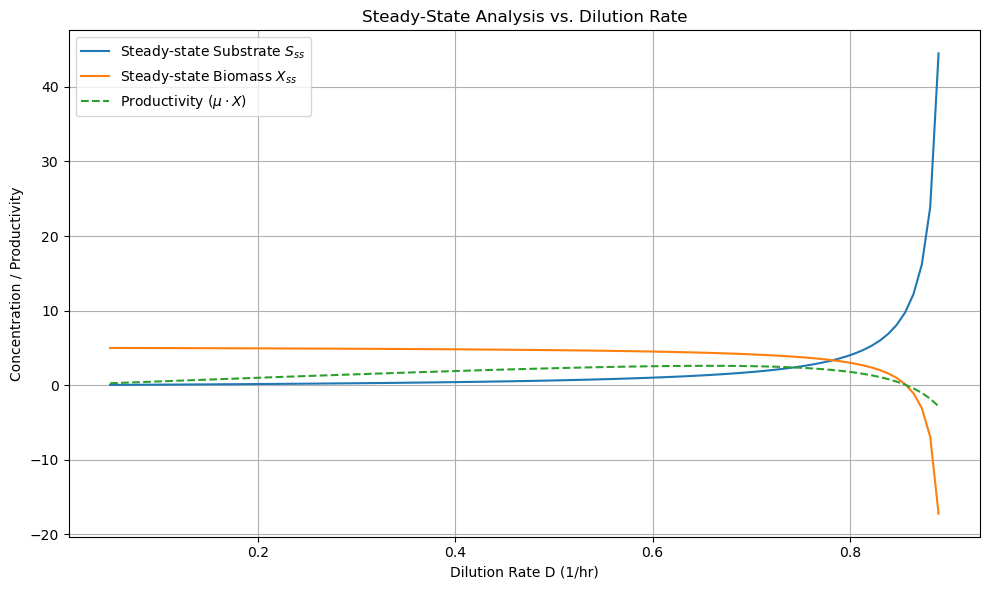

In [11]:
# Parameters
Vmax = 0.9
Km = 0.5
Ki = 10
Y = 0.5
S_in = 10

D_vals = np.linspace(0.05, 0.89, 100)  # D must be < Vmax
S_ss_list = []
X_ss_list = []
P_list = []

for D in D_vals:
    S_ss = (D * Km) / (Vmax - D)
    mu = Vmax * S_ss / (Km + S_ss + S_ss**2 / Ki)
    X_ss = Y * (S_in - S_ss)
    P = mu * X_ss

    S_ss_list.append(S_ss)
    X_ss_list.append(X_ss)
    P_list.append(P)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(D_vals, S_ss_list, label='Steady-state Substrate $S_{ss}$')
plt.plot(D_vals, X_ss_list, label='Steady-state Biomass $X_{ss}$')
plt.plot(D_vals, P_list, label='Productivity ($\mu \cdot X$)', linestyle='--')
plt.xlabel('Dilution Rate D (1/hr)')
plt.ylabel('Concentration / Productivity')
plt.title('Steady-State Analysis vs. Dilution Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ⏱️ Modeling Biological Delay: Substrate Feedback with Time Lag

To reflect realistic biological regulation, we simulate a **time delay (τ)** in how substrate concentration influences microbial growth. In real bioreactors, such delays arise from:

- Sensor and actuator lag in control systems  
- Cellular signaling and regulatory feedback delays  
- Delayed substrate transport or gene expression  

---

### 🧪 Modified Biomass Equation

We update our model as:

$$
\frac{dX}{dt} = \left( \mu(S(t - \tau)) - D \right) \cdot X(t)
$$

The substrate dynamics remain:

$$
\frac{dS}{dt} = D(S_{\text{in}} - S) - \mu(S(t - \tau)) \cdot X(t)
$$

Where:

$$
\mu(S) = \frac{V_{\text{max}} \cdot S}{K_m + S + \frac{S^2}{K_i}}
$$

Here, (τ) is the **time delay** (e.g. 1.5 hours), representing a regulatory lag in how quickly cells respond to substrate changes.





### Observations

- Initially, both substrate and biomass follow stable dynamics  
- Around **t ≈ 15–18 hr**, the system becomes **unstable** due to delayed feedback  
- Biomass **overshoots sharply**, while substrate drops drastically  
- This leads to an eventual collapse in biomass and **substrate rebound**, before stabilizing

---

### Biological Insight

This models a **regulatory lag**:
- The cells keep growing as if substrate is still abundant
- But by the time they respond, the substrate is already depleted
- This results in a mismatch, causing **overshoot and instability**

Delays like this can cause real-world bioreactors to enter **oscillatory**, inefficient, or even **toxic regimes**, unless compensated by smart control strategies.

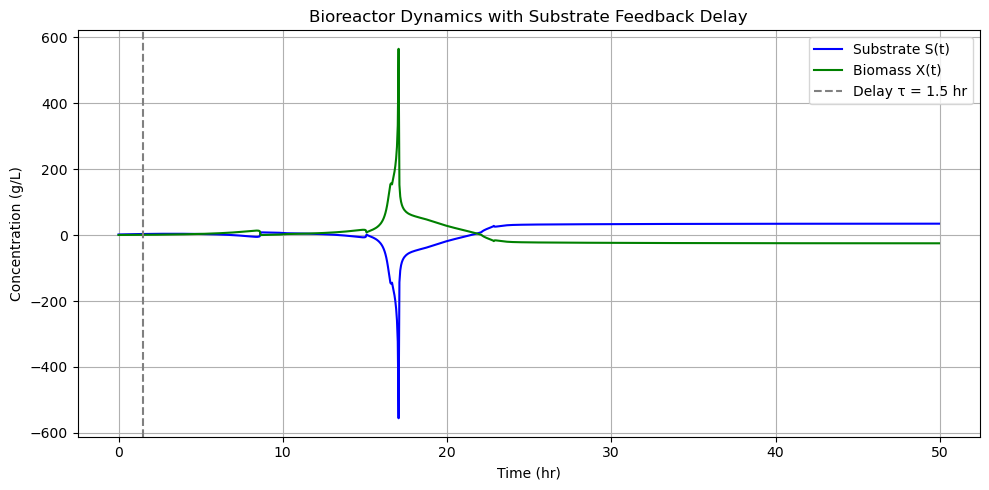

In [18]:
from collections import deque

# Parameters
D = 0.2
S_in = 10
Vmax = 0.9
Km = 0.5
Ki = 10
Y = 0.5
tau = 1.5  # delay in hours

# Time setup
dt = 0.05
t_max = 50
time = np.arange(0, t_max, dt)

# Initial conditions
S = [2.0]
X = [0.5]

# Delay buffer for substrate
delay_steps = int(tau / dt)
S_delay_buffer = deque([S[0]] * delay_steps, maxlen=delay_steps)

# Simulation loop with delayed feedback
for t in time[1:]:
    S_tau = S_delay_buffer[0]  
    mu = Vmax * S_tau / (Km + S_tau + S_tau**2 / Ki)

    dSdt = D * (S_in - S[-1]) - mu * X[-1]
    dXdt = (mu - D) * X[-1]

    S_next = S[-1] + dSdt * dt
    X_next = X[-1] + dXdt * dt

    S.append(S_next)
    X.append(X_next)
    S_delay_buffer.append(S_next)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time, S, label='Substrate S(t)', color='blue')
plt.plot(time, X, label='Biomass X(t)', color='green')
plt.axvline(tau, color='gray', linestyle='--', label=f'Delay τ = {tau} hr')
plt.title('Bioreactor Dynamics with Substrate Feedback Delay')
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (g/L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
